# Project: Investigate a Dataset - FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### <a id='intro'></a>
## Introduction

### Dataset Description 


The following dataset is from the FBI's National Instant Criminal Background Check System (NICS). The NICS is used to determine whether or not a potential gunbuyer is eligible to legally purchase firearms or explosives. Firearms sellers call into the NICS system to confirm the customer does not have a criminal record or is ineligible to make a purchase. The columnal data contains the number of firearm checks by month, state, and type as recorded by gun shop owners and pawn shops selling guns in a given month. Data exists only if a call was made and does not include private sales.

Below is a list of data categories listed in the csv.

'month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals'

The NICS data can also been supplemented with U.S. state level census data csv for further insights. Most variables just have one data point per state (2016), but a few have data for more than one year.

The github repository's README containing the FBI NICS Data lists important details needed to understand the data including possible methods for analysis. The details are as follows:
>...The FBI’s background check numbers come with caveats: ... many checks are for concealed carry permits, not actual gun sales. ...the FBI’s numbers don’t include private gun sales, many of which do not require a background check. Despite those vagaries, the FBI’s NICS numbers are widely accepted as the best proxy for total gun sales in a given time period.

>...Note: Sales estimates are calculated from handgun, long gun and multiple-gun background checks. Permit checks and other categories of background checks are excluded. In California, multiple-gun checks were excluded because data was inconsistent. Because state laws differ, sales levels between states cannot be directly compared.

> ...To convert background checks into estimated sales, we (New York Times) relied on a method suggested in the Small Arms Survey by Jurgen Brauer, a professor at Georgia Regents University. Each long gun and handgun check was counted as 1.1 sales. Each multiple-gun check was counted as two sales. Permit checks and other types of checks were omitted. The multiplier is an estimate based on Mr. Brauer's interviews with gun shop owners.



### Question(s) for Analysis



#### Question 1:
What (5) US states/territories have had the highest gun sales in the last (30) days?
#### Question 2 :
What is the overall trend of gun purchases in California in the last (36) months?



#### Data Anlysis Method
Because of the caveats stated above in the data description section, I have chosen theses questions and will be using the Small Arms Survey method designed by Jurgen Brauer, a professor at Georgia Regents University. A method previousy used by the New York Times in their 2015 research piece on US Gun sales estimates:

- Each long gun and handgun check was counted as 1.1 sales. 
- Each multiple-gun check was counted as two sales. 
- Permit checks and other types of checks were omitted.
- In California, multiple-gun checks will be excluded because data is inconsistent.

Note: The multiplier is an estimate based on Mr. Brauer's interviews with gun shop owners

In [2]:
# import statements for my data analysis packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### Introduction
Here we will do an initial data load of both csvs in their own dataframe. This includes the creation of a combined dataframe containing both data sets to explore possible solutions to our questions above. We will be checking data for initial cleanliness, trimming our data where and if necessary, and also looking for the data needed for analysis if it exists.  

In [3]:
# Read and separate each csv into their own dataframe. Review NCIS Gun Data and US Census Data independently.
# Initial data load, inspection, and exploratory analysis of Gun Data.

df1 = pd.read_csv('gun_data.csv')
df2 = pd.read_csv('US_Census_Data.csv')

df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
# Initial data load, inspection, and exploratory analysis of US Census Data.

df2.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
# Creation of an exploratory combined dataframe to review the data types and see if they match and can
# comfortbaly work together already without changing their types.

combined_df = pd.concat([df1, df2])

combined_df.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317.0,0.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,0.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721.0,1.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Shape method used to see size of the data individually and together.

print('NCIS Gun Data size:', df1.shape)
print('US Census Data size:', df2.shape)
print('NCIS and US Census Data size:', combined_df.shape)

NCIS Gun Data size: (12485, 27)
US Census Data size: (85, 52)
NCIS and US Census Data size: (12570, 79)


In [7]:
# Info method used to get larger summary of NCIS data including data type.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [8]:
# Data type method utilized to inspect NCIS data types for potential cleaning.

df1.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [9]:
# Columns method utilized to inspect NCIS column list.

df1.columns.tolist()

['month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']

In [10]:
# Describe method used to review the descriptive stats of the NCIS gun data this includes reviewing 
# central tendency, dispersion, and shape of the distribution to see if the combined data answers my questions.

df1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000



### Data Cleaning

Thorough review of the structure of my data, included reviewing data types, null values, distribution shape, and missing month data and unnecessary columns. At this phase I have concluded that in order to solve the questions above the following (5) columns of data is required: 'month', 'state', 'handgun', 'long_gun', 'multiple'. The data also only goes up to 2017 and is missing multiple months in each year so the data that will be exported will cover the most recent months of available data and work backwards based analyzing the data that we have and generalizing our totals to be largely representative of what we're looking for.

With the following (5) columns of data I will be able to combine and estimate the totals of all gun sales by state and month as necessary to answer the questions above. 
 

In [11]:
# The cleaned dataframe using the (5) data points, 'month', 'state', 'handgun', 'long_gun', 'multiple' 
# required to answer our questions.

df1[['month', 'state', 'handgun', 'long_gun', 'multiple']]

,month,state,handgun,long_gun,multiple
0,2017-09,Alabama,5734.0,6320.0,317
1,2017-09,Alaska,2320.0,2930.0,160
2,2017-09,Arizona,11063.0,7946.0,631
3,2017-09,Arkansas,4347.0,6063.0,366
4,2017-09,California,37165.0,24581.0,0
...,...,...,...,...,...
12480,1998-11,Virginia,14.0,2.0,8
12481,1998-11,Washington,65.0,286.0,8
12482,1998-11,West Virginia,149.0,251.0,5
12483,1998-11,Wisconsin,25.0,214.0,2


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What (5) US states/territories have had the highest gun sales in the last (30) days?

To answer Question (1) we write a function combining the (5) data variables described above with Jurgen Brauer's formula to reach our total gun sales and counts the data as follows:

- Each long gun and handgun check was counted as 1.1 sales.
- Each multiple-gun check was counted as two sales.
- Permit checks and other types of checks were omitted.
- In California, multiple-gun checks will be excluded because data is inconsistent.

This function will allow me to perform single-variable (1d) and multiple-variable (2d) explorations which I will then plot visually. 

In [12]:
# Function takes (5) variables 'month', 'state', 'handgun', 'long_gun', 'multiple' in the df1 dataframe.
# Executes our formula to create the 'sales_total' column revealing the gun sales for a given state and month.


hand_long_gun = (df1['handgun'] + df1['long_gun']) * 1.1
multiple = df1['multiple'] * 2

df1['sales_total'] = hand_long_gun + multiple

df1[['month', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total']]

,month,state,handgun,long_gun,multiple,sales_total
0,2017-09,Alabama,5734.0,6320.0,317,13893.4
1,2017-09,Alaska,2320.0,2930.0,160,6095.0
2,2017-09,Arizona,11063.0,7946.0,631,22171.9
3,2017-09,Arkansas,4347.0,6063.0,366,12183.0
4,2017-09,California,37165.0,24581.0,0,67920.6
...,...,...,...,...,...,...
12480,1998-11,Virginia,14.0,2.0,8,33.6
12481,1998-11,Washington,65.0,286.0,8,402.1
12482,1998-11,West Virginia,149.0,251.0,5,450.0
12483,1998-11,Wisconsin,25.0,214.0,2,266.9


In [13]:
# Now that we know our code works, we'll limit our ouput to (55) since that is where the data for our
# states and territories repeats for the next month. We then sort our data by ascending and limit that
# output to (5) so we can see the top US States/Territories with the highest gun sales in the last 30 days. 

hand_long_gun = (df1['handgun'] + df1['long_gun']) * 1.1
multiple = df1['multiple'] * 2

df1['sales_total'] = hand_long_gun + multiple

df1_q1 = df1[['month', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total']].head(55)

df1_q1.sort_values(by='sales_total', ascending=False).head(5)

,month,state,handgun,long_gun,multiple,sales_total
46,2017-09,Texas,39119.0,39416.0,2473,91334.5
4,2017-09,California,37165.0,24581.0,0,67920.6
9,2017-09,Florida,39199.0,17949.0,1721,66304.8
40,2017-09,Pennsylvania,39825.0,13222.0,0,58351.7
37,2017-09,Ohio,21085.0,14998.0,1026,41743.3


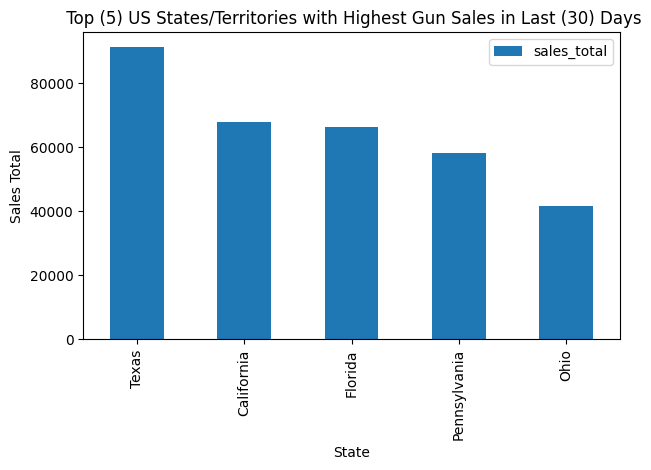

In [14]:
# Plot 1 visually shows the distribution of gun sales through the use of a bar chart.

q1_data = df1_q1.sort_values(by='sales_total', ascending=False).head(5)

q1_data.plot(x='state', y='sales_total', kind='bar')
plt.xlabel('State')
plt.ylabel('Sales Total')
plt.title(' Top (5) US States/Territories with Highest Gun Sales in Last (30) Days')
plt.tight_layout()
plt.show()

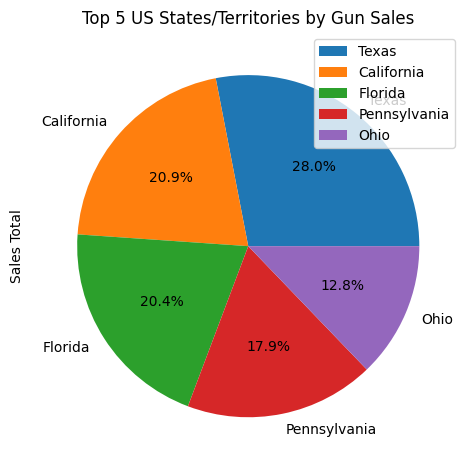

In [15]:
# Plot 2 visually shows distribution via a pie chart to see the percentage of gun sales.

q1_data = df1_q1.sort_values(by='sales_total', ascending=False).head(5)

q1_data.plot(kind='pie', y='sales_total', labels=q1_data['state'], autopct='%1.1f%%')
plt.ylabel('Sales Total')
plt.title('Top 5 US States/Territories by Gun Sales')
plt.tight_layout()
plt.show()

### Research Question 2 :  What is the overall trend of gun purchases in California in the last (36) months?

To answer Question (2) we write a function combining the (5) data variables described above with Jurgen Brauer's formula to reach our total gun sales and counts the data as follows:

- Each long gun and handgun check was counted as 1.1 sales.
- Each multiple-gun check was counted as two sales.
- Permit checks and other types of checks were omitted.
- In California, multiple-gun checks will be excluded because data is inconsistent.

From here we then extend our function to filter by the state of 'California' and then limit our output to our desired month range of (36) to reach our answer.

This function will allow me to perform single-variable (1d) and multiple-variable (2d) explorations which I will then plot visually. 

In [16]:
# For my next question I'll be reusing my formula above and limiting my search to 'California'.
# To do that I'll use the 'loc' method and limit my output to (36) to cover the last (36) months.

hand_long_gun = (df1['handgun'] + df1['long_gun']) * 1.1
multiple = df1['multiple'] * 2

df1['sales_total'] = hand_long_gun + multiple

df1_q2 = df1[['month', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total']]

df1_q2.set_index('state', inplace=True)

df1_q2.loc[['California']].head(36)

,month,handgun,long_gun,multiple,sales_total
state,,,,,
California,2017-09,37165.0,24581.0,0,67920.6
California,2017-08,41110.0,26220.0,0,74063.0
California,2017-07,37027.0,21721.0,0,64622.8
California,2017-06,42726.0,23807.0,0,73186.3
California,2017-05,42442.0,24495.0,0,73630.7
California,2017-04,45182.0,24898.0,0,77088.0
California,2017-03,48732.0,27839.0,0,84228.1
California,2017-02,44363.0,24987.0,0,76285.0
California,2017-01,41516.0,22686.0,0,70622.2


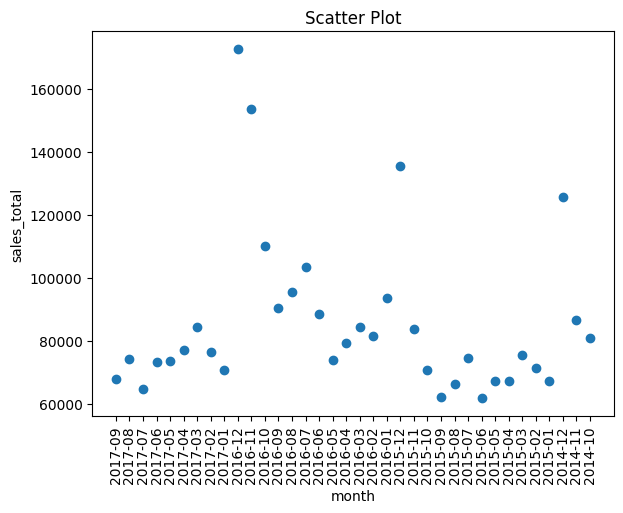

In [17]:
# Plot 1 uses a scatter plot to show positive or negative correlation and possible anomalies.

hand_long_gun = (df1['handgun'] + df1['long_gun']) * 1.1
multiple = df1['multiple'] * 2

df1['sales_total'] = hand_long_gun + multiple

df1_q2 = df1[['month', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total']]

df1_q2.set_index('state', inplace=True)

df1_q2.loc[['California']].head(36)

q2_data = df1_q2.loc[['California']].head(36)

plt.scatter(q2_data['month'], q2_data['sales_total'])
plt.xlabel('month')
plt.ylabel('sales_total')
plt.title('Scatter Plot')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()


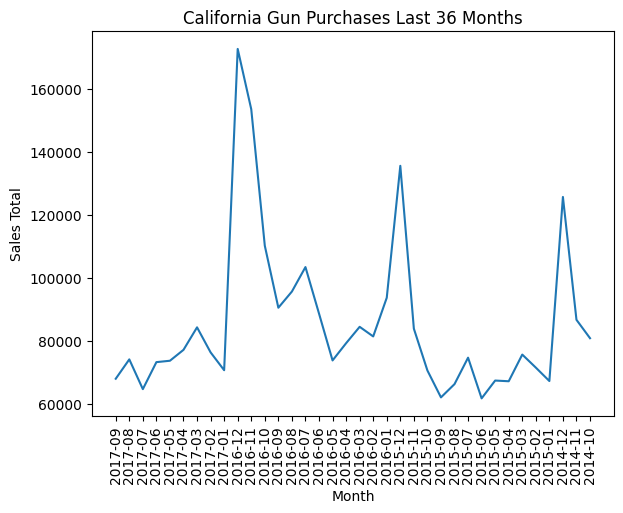

In [18]:
# Plot 2 uses a linear plot to show trends across time.

hand_long_gun = (df1['handgun'] + df1['long_gun']) * 1.1
multiple = df1['multiple'] * 2

df1['sales_total'] = hand_long_gun + multiple

df1_q2 = df1[['month', 'state', 'handgun', 'long_gun', 'multiple', 'sales_total']]

df1_q2.set_index('state', inplace=True)

df1_q2.loc[['California']].head(36)

q2_data = df1_q2.loc[['California']].head(36)

plt.plot(q2_data['month'], q2_data['sales_total'])
plt.xlabel('Month')
plt.ylabel('Sales Total')
plt.title('California Gun Purchases Last 36 Months')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

Gun sales appeared to be on an upward trend from 2014 through to the beginning of 2017 with massive spikes at the end of each year until falling way down at the beginning of 2017 and continues to be trending downward still.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should see output that starts with `NbConvertApp] Converting notebook`, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb